# Naive Bayesian classifier

In [35]:
import numpy as np
import os
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Reading the image data from folder

In [36]:
#Variable for the folder path
folderPath = '../Untitled Folder/yalefaces_crop/'
dataPath = []
for i in os.listdir(folderPath):
    if i != 'Readme.txt':
        dataPath.append(os.path.join(folderPath, i))
        
        
imData = []
imLabels = []

for file in dataPath:
    imRead = io.imread(file, as_grey=True)
    imData.append(imRead)
    labelRead = int(os.path.split(file)[1].split("B")[1].split("_")[0]) #.replace("subject", "")) - 1 # Parse class label from file
    imLabels.append(labelRead)


## Checking data to be correct
Check the amount of images, number of label and print one image

('Number of images ', 2432)
('Number of unique labels ', 38)


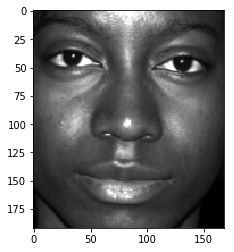

In [37]:
#Number of pictures
amount = len(imData)
#image to be printed
x = imData[np.random.randint(0,amount)]
plt.imshow(x, cmap='gray')
labels = len(np.unique(imLabels))
print ('Number of images ', amount)
print ('Number of unique labels ', labels)
plt.show()

## Reorganising the data

In [73]:
x=np.array(imData)
y = np.array(imLabels)
#amount of data used for training
trnSize = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=trnSize)

## Chenking data to be correct

In [74]:
#Check that data is correct
NumberOfXSamples = len(imData)
NumberOfYSamples = len(imLabels)
if NumberOfXSamples == NumberOfYSamples:
    print('Number of samples :', NumberOfXSamples)
else:
    print('Somting fishy is going on, the Amount of X and Y do not match...')
    print('Number of X: ', NumberOfXSamples, 'and number of Y:', NumberOfYSamples)
#check the number of classes in the data
NumberOfClasses = len(np.unique(y))
print ('Number of unique classes ', NumberOfClasses)


('Number of samples :', 2432)
('Number of unique classes ', 38)


## Modifying the shape of the data for training algorithm

In [75]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]* x_test.shape[2])

## Print the dimensions of the data

In [76]:
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)


nb_classes = len(np.unique(y_test))
print ('Number of unique classes ', nb_classes)

('Training matrix shape', (486, 32256))
('Testing matrix shape', (1946, 32256))
('Number of unique classes ', 38)


# Creating the actual classifier
## Importing needed libaries

In [77]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

## Principal Component Analysis

In [78]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 250
h=192
w=168
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, x_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

#for z in range(3):
#    i = np.random.randint(0,n_components)
#    x = eigenfaces[i]

#    plt.imshow(x, cmap='gray')
#    plt.plot()


print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
x_trainPca = pca.transform(x_train)
x_testPca = pca.transform(x_test)
timePCA = time()-t0
print("done in %0.3fs" % timePCA)



Extracting the top 250 eigenfaces from 486 faces
done in 2.324s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.646s


## Analysing results of the PCA

('eigenface', 49)


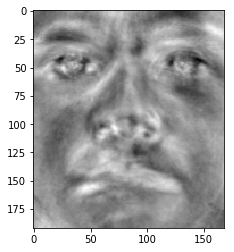

('eigenface', 47)


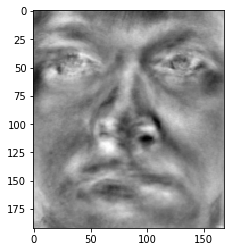

('eigenface', 35)


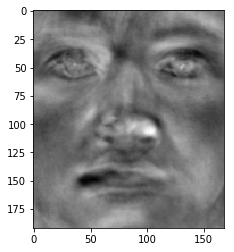

-1.45715
Original picture:


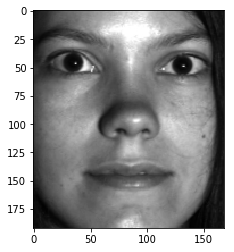

Picture as summatios of projection of eigenfaces:


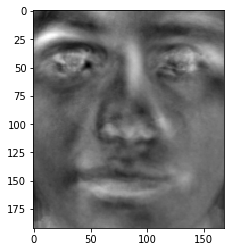

0.0899548
Original picture:


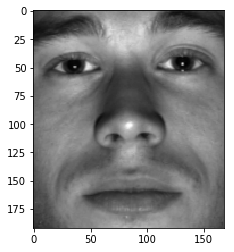

Picture as summatios of projection of eigenfaces:


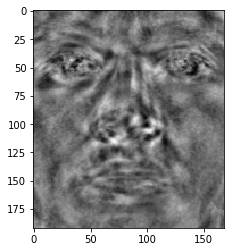

0.311857
Original picture:


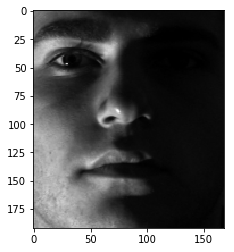

Picture as summatios of projection of eigenfaces:


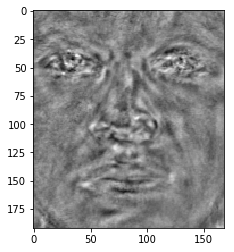

In [79]:
for z in range(3):
    i = np.random.randint(0,n_components)
    x = eigenfaces[i]
    print('eigenface',i)
    plt.imshow(x, cmap='gray')
    plt.show()


for i in [25,143,211]:
    x = []
    for j in range(250):
        if j == 0:
            print x_train_pca[i][j]
            x = np.array(x_trainPca[i][j]*eigenfaces[j])
        else:
            x += x_trainPca[i][j]*eigenfaces[i]
    y = x_train[i+1].reshape(h,w)
    print('Original picture:')
    plt.imshow(y, cmap='gray')
    plt.show()
    print('Picture as summatios of projection of eigenfaces:')
    plt.imshow(x, cmap='gray')
    plt.show()


## Fitting the cassifier

In [80]:
print("Fitting")
t0 = time()
parameterGrid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   parameterGrid, cv=5)
clf = clf.fit(x_trainPca, y_train)
timeFit = time()-t0
print("done in %0.3fs" % timeFit)
print("Using grid values of:")
print(clf.best_estimator_)

Fitting
done in 27.937s
Using grid values of:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/home/ilkka/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [81]:
targetNames = []
for i in range(np.size(np.unique(y_test))):
    targetNames.append(str(np.unique(y_test)[i]))
nb_classes = labels+1

## Testing the quality of the classifier

Predicting labels for test set
done in 0.343s
              precision    recall  f1-score   support

           1       0.95      0.73      0.82        51
           2       0.71      0.92      0.80        49
           3       0.58      0.86      0.69        50
           4       1.00      0.63      0.77        57
           5       0.91      0.78      0.84        54
           6       0.98      0.81      0.89        54
           7       0.87      0.87      0.87        52
           8       0.58      0.91      0.71        54
           9       0.61      0.80      0.69        50
          10       0.93      0.71      0.81        56
          11       0.96      0.86      0.91        50
          12       0.93      0.84      0.88        50
          13       0.98      0.80      0.88        55
          15       0.96      0.80      0.87        55
          16       0.34      0.80      0.48        46
          17       1.00      0.76      0.87        55
          18       0.94      0.98  

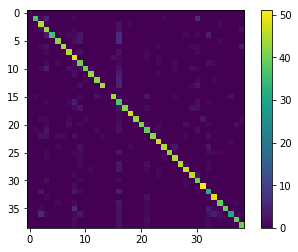

Time used for training: 28.58s
Time used for predictions: 0.34s
Time used for training and predictions: 28.93s


In [82]:
print("Predicting labels for test set")
t0 = time()
y_pred = clf.predict(x_testPca)
timePred = time() -t0
print("done in %0.3fs" % timePred)

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(nb_classes)))
plt.imshow(confusion_matrix(y_test, y_pred, labels=range(nb_classes)));
plt.colorbar()
plt.savefig('confBC%0.2f.png' %trnSize, dpi=199)
plt.show()

print ('Time used for training: %0.2fs'%(timePCA+timeFit))
print ('Time used for predictions: %0.2fs'%(timePred))
print ('Time used for training and predictions: %0.2fs'%(timePCA+timeFit+timePred))


In [84]:

print ('Time used for training: %0.2fs'%(timePCA+timeFit))
print ('Time used for predictions: %0.2fs'%(timePred))
print ('Time used for training and predictions: %0.2fs'%(timePCA+timeFit+timePred))

f = open('classRapBC%0.2f.txt'%trnSize,'w')
f.write(classification_report(y_test, y_pred))
f.close()

Time used for training: 28.58s
Time used for predictions: 0.34s
Time used for training and predictions: 28.93s
